In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('MERGED2016_17_PP.csv')
df_endow = pd.read_csv('NCSE2017 Endowment Markets Values for Media--Final January 31 2018.csv')
top_50 = pd.read_csv('top_50.csv')

/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1431,1432,1503,1504,1517,1518,1519,1529,1530,1531,1532,1534,1535,1537,1538,1539,1540,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1610,1611,1614,1615,1616,1708,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_endow.columns = df_endow.columns.map(str.strip)

In [4]:
df_endow.columns

Index(['Rank', 'UNITID', 'Institution Name', 'City', 'State',
       'FY2017 Endowment (in $1,000s)', 'FY2016 Endowment (in $1,000s)',
       'Change in Market Value (%)2',
       'Fall 2016 Full-time Equivalent (FTE) Students3',
       'FY2017 Endowment Value per FTE Student ($)', 'IPEDS Sector4',
       'IPEDS HBCU Indicator5', 'IPEDS Carnegie Classification6',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [5]:
df = pd.merge(df,df_endow[['UNITID','FY2017 Endowment Value per FTE Student ($)']],on='UNITID', how='left')

In [6]:
df = pd.merge(df,top_50[['INSTNM','top_50']],on='INSTNM', how='left')

In [7]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FY2017 Endowment Value per FTE Student ($),top_50
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10416.07,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7175 entries, 0 to 7174
Columns: 1979 entries, UNITID to top_50
dtypes: float64(1778), int64(11), object(190)
memory usage: 108.4+ MB


In [9]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRYP_FULLTIME_POOLED_SUPP', 'OMENRAP_FULLTIME_POOLED_SUPP',
       'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
       'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP',
       'OMAWDP8_PARTTIME_POOLED_SUPP', 'OMENRUP_PARTTIME_POOLED_SUPP',
       'FY2017 Endowment Value per FTE Student ($)', 'top_50'],
      dtype='object', length=1979)

In [10]:
#Strip any spaces in column names
df.columns = df.columns.map(str.strip)
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRYP_FULLTIME_POOLED_SUPP', 'OMENRAP_FULLTIME_POOLED_SUPP',
       'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
       'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP',
       'OMAWDP8_PARTTIME_POOLED_SUPP', 'OMENRUP_PARTTIME_POOLED_SUPP',
       'FY2017 Endowment Value per FTE Student ($)', 'top_50'],
      dtype='object', length=1979)

In [11]:
df.shape

(7175, 1979)

In [12]:
subset=['INSTNM','STABBR','ADM_RATE_ALL',
        'ICLEVEL','PCTPELL','AGE_ENTRY','FIRST-GEN','PCIP42',
        'PCIP04','PCIP13','PCIP15','PCIP22','PCIP27','PCIP41','PCIP50','PCIP51','NPT4_PUB',
        'PCIP52','TUITIONFEE_IN','TUITIONFEE_OUT','SAT_AVG_ALL','PAR_ED_PCT_1STGEN','DEBT_MDN','FY2017 Endowment Value per FTE Student ($)','top_50']

loan_df = df.filter(subset, axis=1)

In [13]:
loan_df.shape

(7175, 24)

In [14]:
loan_df.head()

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCIP42,PCIP04,PCIP13,PCIP15,...,PCIP51,NPT4_PUB,PCIP52,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,FY2017 Endowment Value per FTE Student ($),top_50
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741368,0.0472,0.0071,0.1132,0.0472,...,0.0000,15567.0,0.1863,9366.0,17496.0,849.0,0.3658280922,13246,10416.07,NaN
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.60797466,0.0766,0.0000,0.0748,0.0000,...,0.2500,16475.0,0.2072,8040.0,18368.0,1125.0,0.341223671,14979.5,NaN,NaN
2,Amridge University,AL,NaN,1,0.6971,33.672297297,0.0000,0.0000,0.0000,0.0000,...,0.0000,NaN,0.3556,7180.0,7180.0,NaN,0.5125,10430,NaN,NaN
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727919632,0.0160,0.0000,0.0282,0.0000,...,0.1911,19423.0,0.2250,9842.0,20612.0,1257.0,0.3101321586,13522,NaN,NaN
4,Alabama State University,AL,0.458964,1,0.7815,20.130990415,0.0503,0.0000,0.1364,0.0000,...,0.1429,15037.0,0.0974,9220.0,16156.0,825.0,0.3434343434,15738,NaN,NaN


In [15]:
#Taking values in the public column and turning into a boolean, 1 for public and 0 for private
loan_df['NPT4_PUB'] = loan_df['NPT4_PUB'].where(loan_df['NPT4_PUB'].isnull(), 1).fillna(0).astype(int)

In [16]:
#renmaing percentage of degrees awarded in a few subjects and Endowment
loan_df.rename(
    inplace=True,
    columns={
        'PCIP42': 'PCPSYCH',
        'PCIP04': "PCARCH",
        'PCIP13': 'PCEDU',
        'PCIP15': 'PCENG_TECH',
        'PCIP22': 'PCLEGAL',
        'PCIP27': 'PCMATH',
        'PCIP41': 'PCSCI',
        'PCIP50': 'PCART',
        'PCIP51': 'PCHEALTH',
        'PCIP52': 'PCBUS',
        'NPT4_PUB':'PUB_PRIV',
        'FY2017 Endowment Value per FTE Student ($)': 'ENDOWSTUD'
    })

In [17]:
loan_df.head(10)

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,...,PCHEALTH,PUB_PRIV,PCBUS,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741368,0.0472,0.0071,0.1132,0.0472,...,0.0000,1,0.1863,9366.0,17496.0,849.0,0.3658280922,13246,10416.07,NaN
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.60797466,0.0766,0.0000,0.0748,0.0000,...,0.2500,1,0.2072,8040.0,18368.0,1125.0,0.341223671,14979.5,NaN,NaN
2,Amridge University,AL,NaN,1,0.6971,33.672297297,0.0000,0.0000,0.0000,0.0000,...,0.0000,0,0.3556,7180.0,7180.0,NaN,0.5125,10430,NaN,NaN
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727919632,0.0160,0.0000,0.0282,0.0000,...,0.1911,1,0.2250,9842.0,20612.0,1257.0,0.3101321586,13522,NaN,NaN
4,Alabama State University,AL,0.458964,1,0.7815,20.130990415,0.0503,0.0000,0.1364,0.0000,...,0.1429,1,0.0974,9220.0,16156.0,825.0,0.3434343434,15738,NaN,NaN
5,The University of Alabama,AL,0.525852,1,0.1938,21.137701396,0.0360,0.0000,0.0782,0.0000,...,0.0988,1,0.2879,10470.0,26950.0,1202.0,0.2257126887,17340,NaN,NaN
6,Central Alabama Community College,AL,NaN,2,0.5109,23.071028037,0.0000,0.0000,0.0000,0.1025,...,0.1209,1,0.0861,4380.0,7890.0,NaN,0.5496760259,5764,NaN,NaN
7,Athens State University,AL,NaN,1,0.4219,30.384765625,0.0308,0.0000,0.2192,0.0000,...,0.0064,0,0.4449,NaN,NaN,NaN,0.4774964838,13461,NaN,NaN
8,Auburn University at Montgomery,AL,0.765921,1,0.4405,22.199804114,0.0668,0.0000,0.0584,0.0000,...,0.2621,1,0.2705,9640.0,20710.0,1009.0,0.38189609,10750,NaN,NaN
9,Auburn University,AL,0.805434,1,0.1532,20.516795866,0.0330,0.0226,0.0941,0.0000,...,0.0667,1,0.2113,10696.0,28840.0,1217.0,0.1726471191,17000,29092.46,NaN


In [18]:
# total number of missing values 
np.count_nonzero(loan_df.isnull())

39171

In [19]:
# total number of columns with missing values
np.count_nonzero(np.any(loan_df.isnull(), axis = 0))

20

In [20]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

ADM_RATE_ALL         4949
PCTPELL               748
AGE_ENTRY             199
PCPSYCH               730
PCARCH                730
PCEDU                 730
PCENG_TECH            730
PCLEGAL               730
PCMATH                730
PCSCI                 730
PCART                 730
PCHEALTH              730
PCBUS                 730
TUITIONFEE_IN        3111
TUITIONFEE_OUT       3330
SAT_AVG_ALL          5748
PAR_ED_PCT_1STGEN     199
DEBT_MDN               19
ENDOWSTUD            6420
top_50               7148
dtype: int64

In [21]:
#replacing 'PrivacySuppressed' entries with Nan values
objects=['DEBT_MDN','AGE_ENTRY', 'PAR_ED_PCT_1STGEN']
for o in objects:
    loan_df[o].replace(to_replace =['PrivacySuppressed'], value = np.nan , inplace=True)

In [22]:
#deleting rows in ADM_RATE_ALL with Nan values
loan_df.dropna(subset = ['ADM_RATE_ALL'], inplace=True)

In [23]:
loan_df.shape

(2226, 24)

In [24]:
#stripping all whitespace strings in dataframe
loan_df = loan_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [25]:
#convert objects to floats
convert_dict = {'DEBT_MDN': float, 
                'AGE_ENTRY': float,
                'PAR_ED_PCT_1STGEN': float,
                'ENDOWSTUD': float
               } 
  
loan_df = loan_df.astype(convert_dict)

In [26]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

PCTPELL               128
AGE_ENTRY              14
PCPSYCH               123
PCARCH                123
PCEDU                 123
PCENG_TECH            123
PCLEGAL               123
PCMATH                123
PCSCI                 123
PCART                 123
PCHEALTH              123
PCBUS                 123
TUITIONFEE_IN         244
TUITIONFEE_OUT        290
SAT_AVG_ALL           799
PAR_ED_PCT_1STGEN     216
DEBT_MDN              113
ENDOWSTUD            1546
top_50               2199
dtype: int64

In [27]:
loan_df.dropna(subset = ['SAT_AVG_ALL'], inplace=True)

In [28]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

PCTPELL                63
PCPSYCH                62
PCARCH                 62
PCEDU                  62
PCENG_TECH             62
PCLEGAL                62
PCMATH                 62
PCSCI                  62
PCART                  62
PCHEALTH               62
PCBUS                  62
TUITIONFEE_IN          49
TUITIONFEE_OUT         55
PAR_ED_PCT_1STGEN      46
DEBT_MDN                4
ENDOWSTUD             860
top_50               1403
dtype: int64

In [29]:
loan_df.dropna(subset = ['DEBT_MDN'], inplace=True)

In [30]:
loan_df.dropna(subset = ['PAR_ED_PCT_1STGEN'], inplace=True)

In [31]:
top_15_schools_with_endowment = loan_df.groupby(['INSTNM'])['ENDOWSTUD'].sum().sort_values(ascending = False).head(15)
print(top_15_schools_with_endowment)

INSTNM
Princeton University                     2951077.11
Yale University                          2191267.54
Stanford University                      1541160.49
Harvard University                       1522103.85
Pomona College                           1321353.28
Massachusetts Institute of Technology    1315750.97
Amherst College                          1255243.16
Swarthmore College                       1207864.11
Williams College                         1188428.82
Grinnell College                         1119716.40
Rice University                           872777.58
Wellesley College                         807322.45
Dartmouth College                         782398.42
University of Notre Dame                  762463.39
Berea College                             702295.67
Name: ENDOWSTUD, dtype: float64


In [32]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

PCTPELL             63
PCPSYCH             62
PCARCH              62
PCEDU               62
PCENG_TECH          62
PCLEGAL             62
PCMATH              62
PCSCI               62
PCART               62
PCHEALTH            62
PCBUS               62
TUITIONFEE_IN       49
TUITIONFEE_OUT      55
ENDOWSTUD          829
top_50            1358
dtype: int64

In [33]:
loan_df.dropna(subset = ['PCTPELL'], inplace=True)

In [34]:
loan_df.shape

(1316, 24)

In [35]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

TUITIONFEE_IN       11
TUITIONFEE_OUT      11
ENDOWSTUD          768
top_50            1295
dtype: int64

In [36]:
loan_df.dropna(subset = ['TUITIONFEE_IN'], inplace=True)

In [37]:
loan_df['ENDOWSTUD'].fillna(0, inplace = True) 

In [38]:
loan_df['top_50'].fillna(0, inplace = True) 

In [39]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 6734
Data columns (total 24 columns):
INSTNM               1305 non-null object
STABBR               1305 non-null object
ADM_RATE_ALL         1305 non-null float64
ICLEVEL              1305 non-null int64
PCTPELL              1305 non-null float64
AGE_ENTRY            1305 non-null float64
PCPSYCH              1305 non-null float64
PCARCH               1305 non-null float64
PCEDU                1305 non-null float64
PCENG_TECH           1305 non-null float64
PCLEGAL              1305 non-null float64
PCMATH               1305 non-null float64
PCSCI                1305 non-null float64
PCART                1305 non-null float64
PCHEALTH             1305 non-null float64
PUB_PRIV             1305 non-null int64
PCBUS                1305 non-null float64
TUITIONFEE_IN        1305 non-null float64
TUITIONFEE_OUT       1305 non-null float64
SAT_AVG_ALL          1305 non-null float64
PAR_ED_PCT_1STGEN    1305 non-null floa

In [40]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [41]:
#Separate our features from our target

X = loan_df.loc[:,['ADM_RATE_ALL', 'PCTPELL', 'AGE_ENTRY', 
                      'PCPSYCH', 'PCEDU', 
                      'PCENG_TECH', 'PUB_PRIV', 'PCBUS', 
                      'TUITIONFEE_IN','TUITIONFEE_OUT','SAT_AVG_ALL','ENDOWSTUD','top_50']]

y = loan_df['DEBT_MDN']

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 6734
Data columns (total 13 columns):
ADM_RATE_ALL      1305 non-null float64
PCTPELL           1305 non-null float64
AGE_ENTRY         1305 non-null float64
PCPSYCH           1305 non-null float64
PCEDU             1305 non-null float64
PCENG_TECH        1305 non-null float64
PUB_PRIV          1305 non-null int64
PCBUS             1305 non-null float64
TUITIONFEE_IN     1305 non-null float64
TUITIONFEE_OUT    1305 non-null float64
SAT_AVG_ALL       1305 non-null float64
ENDOWSTUD         1305 non-null float64
top_50            1305 non-null float64
dtypes: float64(12), int64(1)
memory usage: 142.7 KB


### Cross Validation

In [43]:
#Split the data 60 - 20 - 20 train/val/test
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [44]:
X_train.columns

Index(['ADM_RATE_ALL', 'PCTPELL', 'AGE_ENTRY', 'PCPSYCH', 'PCEDU',
       'PCENG_TECH', 'PUB_PRIV', 'PCBUS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
       'SAT_AVG_ALL', 'ENDOWSTUD', 'top_50'],
      dtype='object')

In [45]:
selected_columns = ['ADM_RATE_ALL', 'PCTPELL', 'AGE_ENTRY', 
                      'PCPSYCH', 'PCEDU', 
                      'PCENG_TECH', 'PUB_PRIV', 'PCBUS', 
                      'TUITIONFEE_IN','TUITIONFEE_OUT','SAT_AVG_ALL','ENDOWSTUD','top_50']


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 2842 to 229
Data columns (total 13 columns):
ADM_RATE_ALL      783 non-null float64
PCTPELL           783 non-null float64
AGE_ENTRY         783 non-null float64
PCPSYCH           783 non-null float64
PCEDU             783 non-null float64
PCENG_TECH        783 non-null float64
PUB_PRIV          783 non-null int64
PCBUS             783 non-null float64
TUITIONFEE_IN     783 non-null float64
TUITIONFEE_OUT    783 non-null float64
SAT_AVG_ALL       783 non-null float64
ENDOWSTUD         783 non-null float64
top_50            783 non-null float64
dtypes: float64(12), int64(1)
memory usage: 85.6 KB


In [47]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

lasso_model = Lasso(alpha = 10000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
list(zip(selected_columns, lasso_model.coef_))

[('ADM_RATE_ALL', 0.0),
 ('PCTPELL', -0.0),
 ('AGE_ENTRY', -0.0),
 ('PCPSYCH', -0.0),
 ('PCEDU', -0.0),
 ('PCENG_TECH', 0.0),
 ('PUB_PRIV', 0.0),
 ('PCBUS', -0.0),
 ('TUITIONFEE_IN', 0.09914565924310967),
 ('TUITIONFEE_OUT', 0.1387244427069504),
 ('SAT_AVG_ALL', 2.1540222249241627),
 ('ENDOWSTUD', -0.009385108289691586),
 ('top_50', 0.0)]

In [49]:
X_train_collinear = X_train.loc[:,selected_columns]

In [50]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('ADM_RATE_ALL', -1.7401416968052275e-08),
 ('PCTPELL', -1.213149504025441e-07),
 ('AGE_ENTRY', -1.8426957593970523e-06),
 ('PCPSYCH', 4.4046857734488675e-09),
 ('PCEDU', -1.8371503456922286e-08),
 ('PCENG_TECH', -6.0995912839128744e-09),
 ('PUB_PRIV', -4.572813684758899e-07),
 ('PCBUS', 4.76088996585057e-09),
 ('TUITIONFEE_IN', 0.01997808008761517),
 ('TUITIONFEE_OUT', 0.016017613061856707),
 ('SAT_AVG_ALL', 0.00010320388944908651),
 ('ENDOWSTUD', -0.001926503324752421),
 ('top_50', -1.7969248480699483e-08)]

In [51]:
lr_model_lasso = Lasso(alpha = 100000)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('ADM_RATE_ALL', 0.0),
 ('PCTPELL', -0.0),
 ('AGE_ENTRY', -0.0),
 ('PCPSYCH', -0.0),
 ('PCEDU', -0.0),
 ('PCENG_TECH', 0.0),
 ('PUB_PRIV', 0.0),
 ('PCBUS', -0.0),
 ('TUITIONFEE_IN', 0.0874254270301279),
 ('TUITIONFEE_OUT', 0.16349162914508064),
 ('SAT_AVG_ALL', 0.0),
 ('ENDOWSTUD', -0.00875928216879823),
 ('top_50', 0.0)]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_tr = std.transform(X_train.values)

In [55]:
X_te = std.transform(X_test.values)

In [56]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([365., 323.,  68.,  14.,   8.,   3.,   1.,   0.,   0.,   1.]),
 array([-1.26586833, -0.18469157,  0.89648519,  1.97766195,  3.05883872,
         4.14001548,  5.22119224,  6.302369  ,  7.38354576,  8.46472252,
         9.54589928]),
 <a list of 10 Patch objects>)

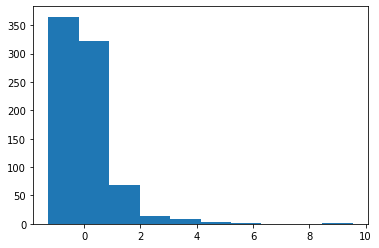

In [57]:
plt.hist(X_tr[:,3])

In [58]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
list(zip(X_train.columns, lasso_model.coef_))

[('ADM_RATE_ALL', -0.0),
 ('PCTPELL', -0.0),
 ('AGE_ENTRY', -0.0),
 ('PCPSYCH', 0.0),
 ('PCEDU', -0.0),
 ('PCENG_TECH', -0.0),
 ('PUB_PRIV', -0.0),
 ('PCBUS', 0.0),
 ('TUITIONFEE_IN', 0.0),
 ('TUITIONFEE_OUT', 0.0),
 ('SAT_AVG_ALL', 0.0),
 ('ENDOWSTUD', -0.0),
 ('top_50', -0.0)]